In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Импорт библиотеки TensorFlow   она используется для определения, компиляции и обучения нейронных сетей
from tensorflow.keras.models import Sequential  # Импорт модели Sequential(используется для определения архитектуры нейронных сетей.)
from tensorflow.keras.layers import Dense, Activation  # Импорт слоев Dense(В этом примере используется для создания полносвязанных (плотных) слоев.) и Activation(вводят нелинейность в модель, позволяя ей учить более сложные зависимости.)
from tensorflow.keras.datasets import mnist  # Импорт датасета MNIST
from tensorflow.keras.utils import to_categorical  # Импорт утилиты to_categorical для преобразования меток классов

In [ ]:
# Загрузка данных MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Загрузка тренировочных и тестовых данных MNIST
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0  # Подготовка тренировочных данных
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0  # Подготовка тестовых данных
y_train = to_categorical(y_train, 10)  # Преобразование меток тренировочных данных в one-hot формат
y_test = to_categorical(y_test, 10)  # Преобразование меток тестовых данных в one-hot формат
#В данном коде MNIST используется для демонстрации и обучения моделей нейронных сетей на задаче классификации цифр.
#Каждое изображение в наборе данных MNIST представляет собой цифру от 0 до 9, и задача состоит в том, чтобы обучить модель правильно классифицировать цифры на основе их изображений.

In [ ]:
# Общие параметры
input_size = 784  # Размерность входных данных (Количество признаков на входном слое (в данном случае, 28x28 = 784, так как изображения MNIST имеют размер 28x28 пикселей).)
output_size = 10  # Количество классов(Количество классов на выходном слое (в данном случае, 10 классов для цифр от 0 до 9).)

In [ ]:
# Создание и компиляция моделей с разными функциями активации

# Сигмоида
model_sigmoid = Sequential([  # Создание последовательной модели
    Dense(64, input_shape=(input_size,)),  # Полносвязный слой с 64 нейронами и указанием размерности входных данных
    Activation('sigmoid'),  # Функция активации - сигмоида
    Dense(output_size),  # Выходной полносвязный слой с количеством нейронов равным количеству классов
    Activation('softmax')  # Функция активации - softmax для задачи классификации
])
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Компиляция модели

# Гиперболический тангенс
model_tanh = Sequential([
    Dense(64, input_shape=(input_size,)),
    Activation('tanh'),  # Функция активации - гиперболический тангенс
    Dense(output_size),
    Activation('softmax')
])
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ReLU
model_relu = Sequential([
    Dense(64, input_shape=(input_size,)),
    Activation('relu'),  # Функция активации - ReLU
    Dense(output_size),
    Activation('softmax')
])
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Leaky ReLU
model_leaky_relu = Sequential([
    Dense(64, input_shape=(input_size,)),
    tf.keras.layers.LeakyReLU(alpha=0.01),  # Функция активации - Leaky ReLU
    Dense(output_size),
    Activation('softmax')
])
model_leaky_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Parametric ReLU (PReLU)
model_prelu = Sequential([
    Dense(64, input_shape=(input_size,)),
    tf.keras.layers.PReLU(alpha_initializer=tf.initializers.Constant(value=0.25)),  # Функция активации - PReLU
    Dense(output_size),
    Activation('softmax')
])
model_prelu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Gelu
model_gelu = Sequential([
    Dense(64, input_shape=(input_size,)),
    tf.keras.layers.Activation(tf.keras.activations.gelu),
    Dense(output_size),
    Activation('softmax')
])
model_gelu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Обучение моделей
batch_size = 64
epochs = 10

In [ ]:
# Обучение каждой модели на тренировочных данных с использованием валидационного разделения
print('Сигмоида')
history_sigmoid = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
print('Гиперболический тангенс')
history_tanh = model_tanh.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
print('ReLU')
history_relu = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
print('Leaky ReLU')
history_leaky_relu = model_leaky_relu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
print('Parametric ReLU')
history_prelu = model_prelu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
print('Gelu')
history_gelu = model_gelu.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Сигмоида
Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.6574 - accuracy: 0.8464 - val_loss: 0.3169 - val_accuracy: 0.9183
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.2866 - accuracy: 0.9219 - val_loss: 0.2362 - val_accuracy: 0.9360
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2259 - accuracy: 0.9362 - val_loss: 0.2018 - val_accuracy: 0.9439
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.1909 - accuracy: 0.9458 - val_loss: 0.1798 - val_accuracy: 0.9498
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1658 - accuracy: 0.9530 - val_loss: 0.1624 - val_accuracy: 0.9548
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1463 - accuracy: 0.9590 - val_loss: 0.1510 - val_accuracy: 0.9568
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1311 - accuracy: 0.9633 - val_loss: 0.1435 - val_accuracy: 0.9

Epoch 1/10, Epoch 2/10, ..., Epoch 10/10:

Это эпохи обучения. Одна эпоха означает один проход через весь набор данных обучения.
750/750 [==============================]:

Каждая строка представляет собой одну эпоху.
 "750/750" указывает на количество пакетов (батчей), которые прошли через модель в течение эпохи.
loss: 0.6431, accuracy: 0.8523, val_loss: 0.3185, val_accuracy: 0.9147:

loss (функция потерь): Это значение, которое минимизируется в процессе обучения. Низкое значение указывает на хорошую производительность модели.
accuracy (точность): Доля правильно классифицированных примеров на обучающих данных.
val_loss (валидационная функция потерь): Функция потерь на валидационном наборе данных. Это значение должно быть низким для хорошей обобщающей способности модели.
val_accuracy (валидационная точность): Точность на валидационном наборе данных. Это показывает, насколько хорошо модель обобщается на новые данные.
Пример:

В первой эпохе для одной из моделей:
loss: 0.6431 (на обучающих данных), accuracy: 0.8523.
val_loss: 0.3185 (на валидационных данных), val_accuracy: 0.9147.
Общая тенденция:

С увеличением эпох обучения обычно ожидается, что loss будет уменьшаться, а accuracy и val_accuracy увеличиваться. Однако, если валидационная точность начинает уменьшаться после некоторого числа эпох, это может быть признаком переобучения модели.

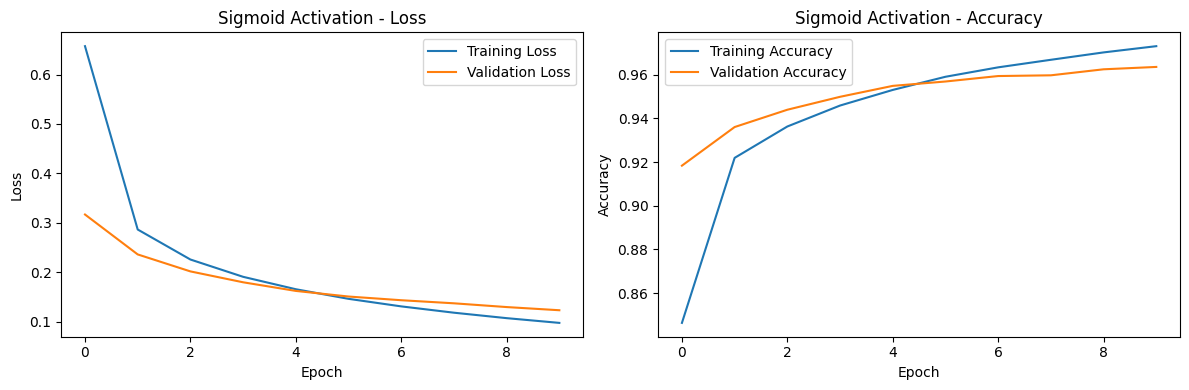

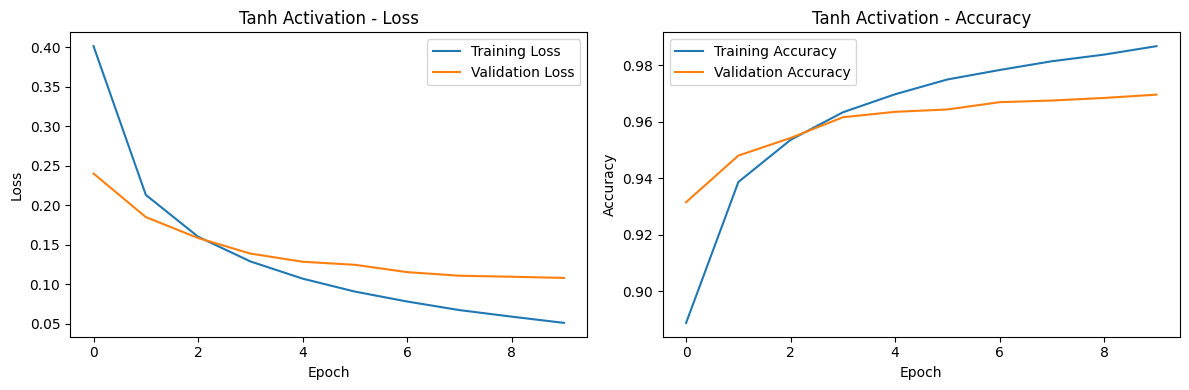

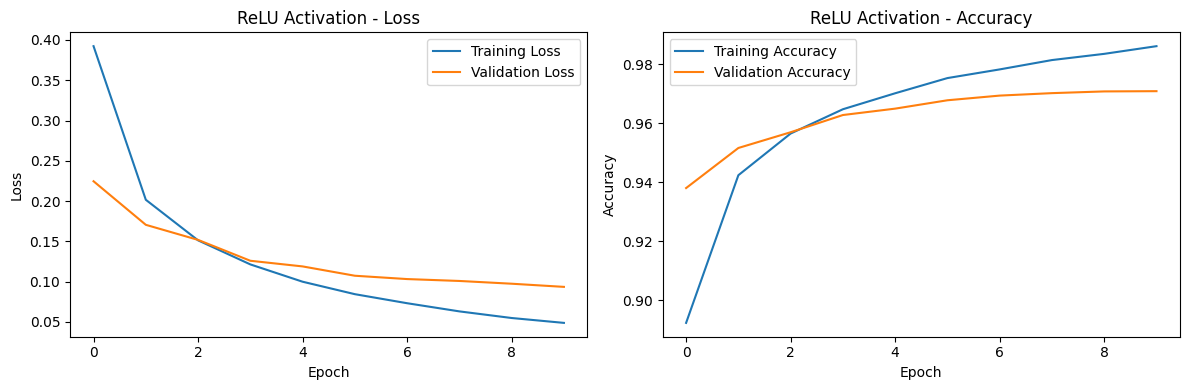

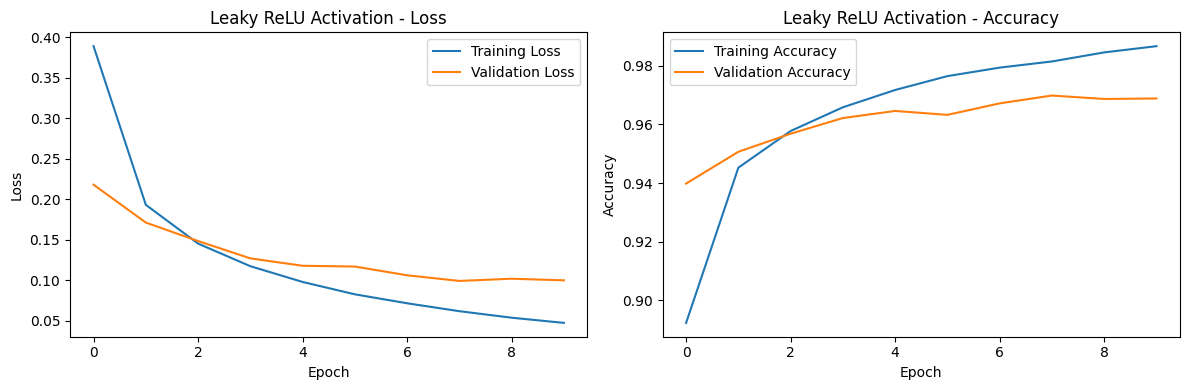

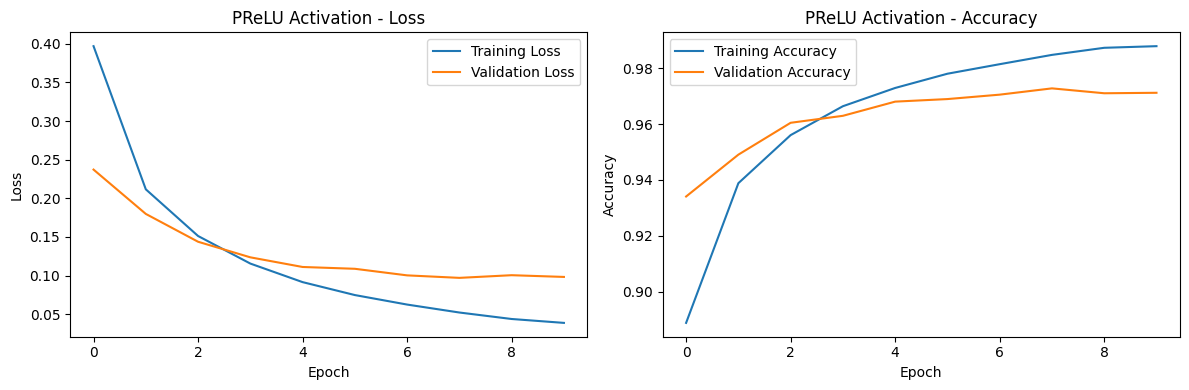

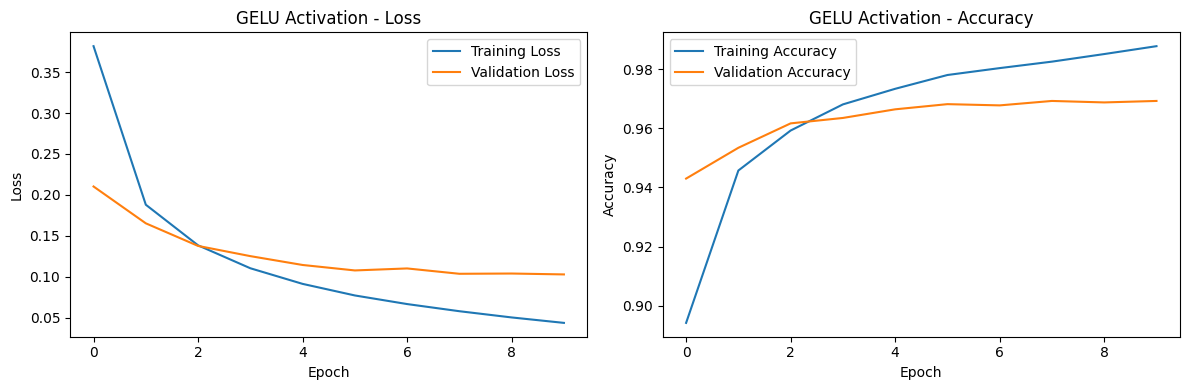

In [ ]:
def plot_history(history, title):
    # График потерь
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title + ' - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title + ' - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Обучение и отображение графиков для каждой модели
plot_history(history_sigmoid, 'Sigmoid Activation')
plot_history(history_tanh, 'Tanh Activation')
plot_history(history_relu, 'ReLU Activation')
plot_history(history_leaky_relu, 'Leaky ReLU Activation')
plot_history(history_prelu, 'PReLU Activation')
plot_history(history_gelu, 'GELU Activation')